## How to read an image in python3 - OpenCV

First import the necessary librarys
to get matplotlib:
- pip install matplotlib 

In [5]:
import numpy as np
import cv2
import math
import time as t
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.mlab as mlab
from random import randint
import copy

print ("OpenCV version :  {0}".format(cv2.__version__))

OpenCV version :  3.3.0


In [6]:
import sys
print(sys.executable)

C:\Users\nur20\Anaconda3\envs\DIA\python.exe


Load an Image
- imagecolor (0) for gray
- imagecoror (1) for color

In [7]:
imagecolor = 0
img = cv2.imread('images/Lenna.png',imagecolor)    

# Convert your image vom BGR to RGB
- Loaded Image has BGR Format
- Convert BGR to RGB if you want to show a color image
- If you sellected grayscale, this is not necessary
- Infor about python Format Strings (print("{stuff}").format -> https://pyformat.info/

You have choosen Grayscale


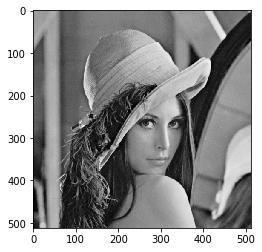

In [8]:
if(imagecolor == 0):
    print("You have choosen Grayscale")
    arr = np.asarray(img)
    plt.imshow(arr, cmap='gray')
    plt.show()
else:
    t0 = t.time()
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    t1 = t.time()
    dt_cv = t1-t0
    print ("Conversion from BGR to RGB took {:03.6f} seconds".format(dt_cv))      
    plt.imshow(cv_rgb)
    plt.show()


# Gaussian distribution 
\begin{equation*}
n(x,y) \approx g(n) = e^{\frac{-n^2}{2\sigma^2}}
\end{equation*}
- Noice can be added to every single pixel or multiplied with it.
- In most cases it is added!
- Mean is zero
- Biggest propability is no noice (Around zero)

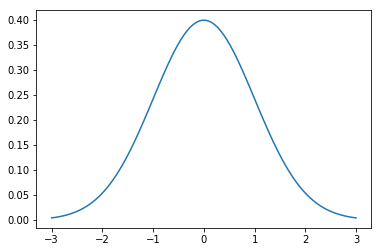

Gaussian distribution is Bellshaped


In [9]:
import matplotlib.mlab as mlab
mu = 0 #Max at 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)

plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()
print("Gaussian distribution is Bellshaped")

Original image


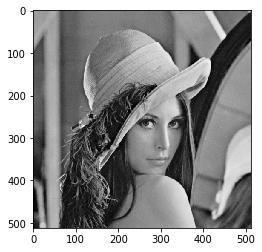

Image with added noice


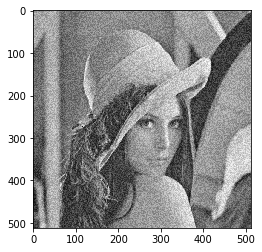

In [10]:
img_gauss = copy.copy(img)
for row in range(0,512-1):
    for column in range(0,512-1):
        img_gauss[row,column]=img[row,column]+(randint(-30,30))
print("Original image")
plt.imshow(img, cmap='gray')
plt.show()
print("Image with added noice")
plt.imshow(img_gauss, cmap='gray')
plt.show()

# Uniform Distribution (Salt & Pepper Noise)

- It presents itself as sparsely occuring white and black pixels.
- Can be caused by sharp and sudden disturbances in the image signal of an image.

![Uniform Distribution](images/Uniform_distribution.png)

Original image


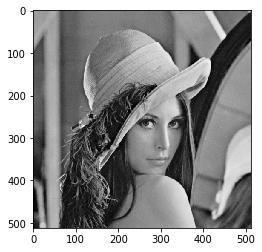

Image with added impulse noice


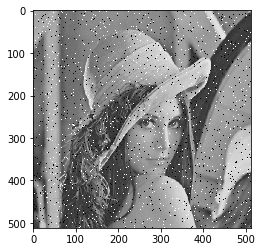

In [11]:
img_uniform = copy.copy(img)
for row in range(0,512-1):
    for column in range(0,512-1):
        temp = randint(0,50)
        if(temp == 1):
            img_uniform[row,column] = 0
        if(temp == 2):
            img_uniform[row,column] = 255
        
print("Original image")
plt.imshow(img, cmap='gray')
plt.show()
print("Image with added impulse noice")
plt.imshow(img_uniform, cmap='gray')
plt.show()

# Derivative

\begin{equation*}
\frac{df}{dx} = \lim \Delta x \rightarrow 0   \frac{f(x)-f(x-\Delta x)}{\Delta x} = f'(x)=fx
\end{equation*}

- The minimum stepsize on an image is 1 and it is never a float so $\Delta x$ can be set to 1

\begin{equation*}
\frac{df}{dx} = \lim \Delta x \rightarrow 0   f(x)-f(x-1) = f'(x)=fx
\end{equation*}

- That means that the derivative in x direction is just $f(x) - f(x-1)$ This is called "Backward Difference"
- We can also do "Forward Difference" by adding 1 or of "Central Difference" $f(x+1)-f(x-1)=f'(x)$

# Derivative Masks
- You can create derivative masks
- Backward difference -> $ [-1 1] $
- Forward difference -> $ [1 -1] $
- Central Difference -> $ [-1 0 1]$

# USE Filter / Convolution
- First example: Averageing / Average Filter / Box Filter
- We create a 5x5 matrix containing only ones
- Replaces each pixel with an average of its neighborhood
- Achieve smoothing effect (remove sharp features)
- [1 1 1 1 1]
- [1 1 1 1 1]
- [1 1 1 1 1] x $1/25$
- [1 1 1 1 1]
- [1 1 1 1 1]


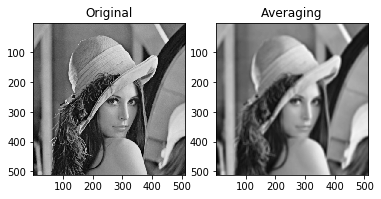

In [12]:
kernel = np.ones((9,9),np.float32)/81
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([500,400,300,200,100]), plt.yticks([500,400,300,200,100])
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Averaging')
plt.xticks([500,400,300,200,100]), plt.yticks([500,400,300,200,100])
plt.show()

- Second example: Gaussian filtering
- Better than Averaging
- Values in matrix not like in code (just as an explanation)
- Filter uses weighted matrix
- Zentral pixel has highest weight so it is the most important one
- [1 1 1 1 1]
- [1 2 2 2 1]
- [1 2 3 2 1] x  $1/25 $
- [1 2 2 2 1]
- [1 1 1 1 1]

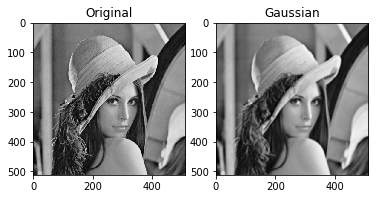

In [13]:
gaussian_img = cv2.GaussianBlur(img,(9,9),0)
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(gaussian_img, cmap='gray'),plt.title('Gaussian')
plt.show()

# Sobel / Gradient / Edgedetection
- Sobel Filter first applies gaussian smoothing on the image 
- Then it differentiates the image in X direction or in Y direction 
- The result is an edge detection filter
- The result of the differentiation can also be negativ.
- To create a black and white image, you need to make the negativ values positiv


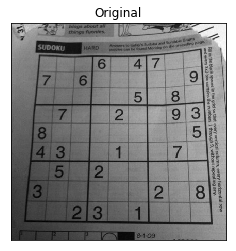

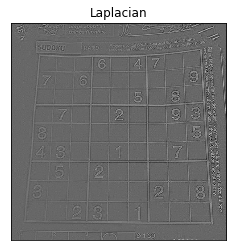

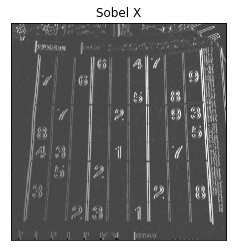

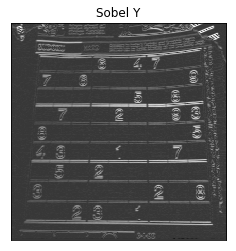

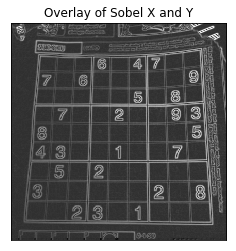

In [14]:
sudoku_img = cv2.imread('images/Sudoku-original.jpg',0)

laplacian = cv2.Laplacian(sudoku_img,cv2.CV_64F)
sobelx = cv2.Sobel(sudoku_img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(sudoku_img,cv2.CV_64F,0,1,ksize=5)

for row in range(0,419):
    for column in range(0,419):
        if(sobely[row,column] <0):
            sobely[row,column] = sobely[row,column] * (-1)
        if(sobelx[row,column] <0):
            sobelx[row,column] = sobelx[row,column] * (-1)
            
plt.imshow(sudoku_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

dst = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.imshow(dst,cmap = 'gray')
plt.title('Overlay of Sobel X and Y'), plt.xticks([]), plt.yticks([])
plt.show()


# Median Filter
- This filter is extremely good in reducing salt and papper noice
- It takes 5 values, sorts them and repaces the anker pixel by the middle value form the sorted list
- Pixel errors like in the immage below will all be replaced

Image with added salt and papper noice


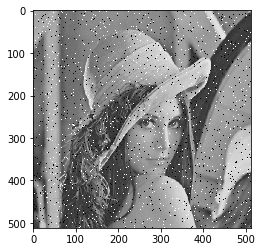

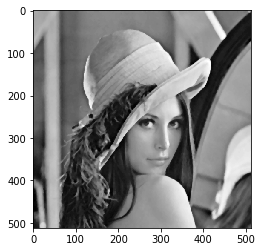

In [15]:
print("Image with added salt and papper noice")
plt.imshow(img_uniform, cmap='gray')
plt.show()

median = cv2.medianBlur(img_uniform,5)
plt.imshow(median, cmap='gray')
plt.show()
